# Python, Centrale Lille, G3 SDIA
---
## Session 2: Some practice with Numpy, Scipy, Pandas, h5py and Matplotlib

---
## Guidelines (read carefully before starting)


**Objectives**: acquire some practice with libraries commonly used in data science (`numpy`, `scipy`, `pandas`, `hdf5`, `matplotlib`).

**Guidelines**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention tp2_Name1_Name2
- duplicate the notebook file and rename it tp2_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `tp2` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=tp2 --file=requirement.txt
    conda activate tp2
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=tp2
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `tp2`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; global grade from F to A (A+)

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. Any code produced should be commented whenever appropriate, custom functions and objects documented and unit-tested (see session 1). Figure produced should be clearly annotated (axis, title, legend whenever appropriate).

1. Numerical correctness
2. Implementation clarity (documentation, relevance of the comments)
3. Unit-tests developed whenever appropriate (correctness, relevance)
4. Answers to the questions and overall presentation of the Jupyter notebook.

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)


## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete anisotropic total variation](#ex3)
---

In [1]:
%load_ext autoreload
%autoreload 2
!mkdir img

---
## <a name="ex1">Exercise 1: Random variables and histograms</a> [(&#8593;)](#content)

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

In [2]:
#Q1
from numpy.random import default_rng
import numpy as np

rng = default_rng(11) #Set the random seed to 11
x = rng.random()  #Generate a pseudo-random number based on seed value
print(x)   #We got the same number when we execute several times

0.12857020276919962


2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

In [3]:
#Q2
alpha, beta, sample_size = 9, 2, 10**5 #Set values
s = np.random.gamma(alpha, beta, sample_size) #Generate samples from gamma distribution
np.save('samples', s) #create (or overwrite if it already exists) a .npy file named samples and save s inside

3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a pdf;
> - do not forget to include a proper title, axis, ... to the figure.

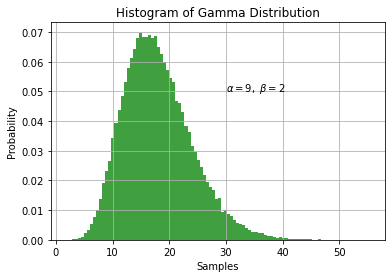

In [4]:
#Q3
import matplotlib.pyplot as plt
x = np.load('samples.npy') #Get sample from the .npy file created at Q2
n, bins, patches = plt.hist(x, 100, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Samples')
plt.ylabel('Probability')
plt.title('Histogram of Gamma Distribution')
plt.text(30, .05, r'$\alpha=$'+str(alpha)+r'$,\ \beta=$'+str(beta))
plt.grid(True)
plt.show()

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

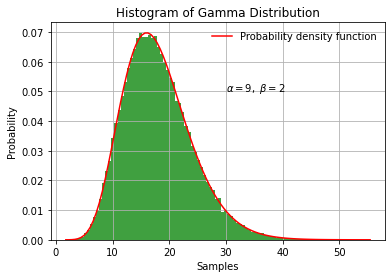

In [5]:
import scipy.special as sps 

#Stuff from Q3
x = np.load('samples.npy') #Get sample from the .npy file created at Q2
n, bins, patches = plt.hist(x, 100, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Samples')
plt.ylabel('Probability')
plt.title('Histogram of Gamma Distribution')
plt.text(30, .05, r'$\alpha=$'+str(alpha)+r'$,\ \beta=$'+str(beta))
plt.grid(True)

#Overlay the probability density function on the histogram
y = bins**(alpha-1)*(np.exp(-bins/beta)/(sps.gamma(alpha)*beta**alpha))
plt.plot(bins, y,color='r',label='Probability density function')
plt.legend(loc='best', frameon=False)
plt.savefig('Gamma_Distribution.png') #Save the plot as .png file
plt.show()

The gamma distribution fits well to the probability density function

---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a> [(&#8593;)](#content)

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

In [6]:
#Q1
import pandas as pd
from IPython.display import display
data = pd.read_csv("./data/data.csv") #load data into a DataFrame
data = data.sort_values(by=['X']) #Sort data by X values
medianX, medianY = data.median(axis = 0)
meanX, meanY = data.mean(axis = 0)
varX, varY = data.var(axis = 0)
stdX, stdY = data.std(axis = 0)
print("MedianX: "+str(medianX)+" | MedianY: "+str(medianY))
print("MeanX: "+str(meanX)+" | MeanY: "+str(meanY))
print("VarianceX: "+str(varX)+" | VarianceY: "+str(varY))
print("Standard deviationX: "+str(stdX)+" | Standard deviationY: "+str(stdY))

MedianX: 180.5 | MedianY: 24.0
MeanX: 153.75 | MeanY: 25.916666666666668
VarianceX: 3486.0227272727275 | VarianceY: 42.446969696969695
Standard deviationX: 59.04255014201815 | Standard deviationY: 6.5151338970868204


2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

In [7]:
#Q2
x, y = data['X'], data['Y']
z = np.polyfit(x, y, 1) #Polyfit of degree 1 = regression line
print("Y ="+str(z[0])+"X +"+str(z[1])) #Y=aX+b with a=z[0] and b=z[1]

Y =-0.09816474883463185X +41.00949679999132


3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

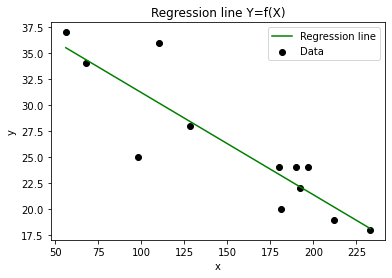

In [8]:
#Q3
xsupport = pd.DataFrame(np.linspace(min(data.X),max(data.X),500))
y_ = z[0]*xsupport + z[1]
plt.scatter(x, y, c='k', label='Data') #Cloud of points
plt.plot(xsupport, y_, c='g', label='Regression line') #Regression line of this cloud
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regression line Y=f(X)")
plt.savefig('Regression_Line.png') #Save the plot as .png file

---
## <a name="ex3">Exercise 3: Discrete anisotropic total variation</a> [(&#8593;)](#content)

This exercise is devoted to the computation of the discrete anisotropic total variation (TV) of an input matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{align*}
    \text{TV}(\mathbf{X}) &= \Vert D(\mathbf{X}) \Vert_{\text{F}} = \sqrt{\Vert \mathbf{XD}_h \Vert_{\text{F}}^2 + \Vert \mathbf{D}_v\mathbf{X}\Vert_{\text{F}}^2} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N}
\end{align*}

where $\Vert \cdot \Vert_{\text{F}}$ is the Frobenius norm, $\mathbf{x}_n \in \mathbb{C}^{N}$ is the $n$th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times M}$ is the $m$th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. Its adjoint, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{n=2}^{N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{m=2}^{M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$th row of $\mathbf{Y}_v$.


1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

In [9]:
# your answer(s)

2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the functioni s evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

In [10]:
# your answer(s)

3\. Document the function `gradient2D` with an appropriate docstring (see session 1).

In [11]:
# your answer(s)

4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

In [12]:
# your answer(s)

5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

In [13]:
# your answer(s)

6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \langle D(\mathbf{X}), \mathbf{Y} \rangle = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle, 
    \label{eq:adjoint}
\end{equation}

where $\langle \mathbf{U}, \mathbf{V} \rangle = \text{Tr}(\mathbf{U}^H \mathbf{V})$. 

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate \eqref{eq:adjoint} for a randomly drawn matrix, setting the random generator to a known state (see [Exercise 1](#ex1)).

In [14]:
# your answer(s)

[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions, i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option. 

In [15]:
# your answer(s)